In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [3]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [4]:
df=df.drop('Unnamed: 0',axis=1)
print(df.columns.tolist())

['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit c

In [5]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [6]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
model_dt.score(x_test,y_test)

0.7732764747690121

In [12]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.47      0.52       371

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [16]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9296137339055794
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       535
           1       0.92      0.95      0.94       630

    accuracy                           0.93      1165
   macro avg       0.93      0.93      0.93      1165
weighted avg       0.93      0.93      0.93      1165



In [17]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[482  53]
 [ 29 601]]


#### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [20]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [21]:
y_pred=model_rf.predict(x_test)

In [22]:
model_rf.score(x_test,y_test)

0.8017057569296375

In [23]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.50      0.57       371

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [24]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [25]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [26]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [27]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [28]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [29]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [30]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9172354948805461
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       545
           1       0.90      0.95      0.92       627

    accuracy                           0.92      1172
   macro avg       0.92      0.91      0.92      1172
weighted avg       0.92      0.92      0.92      1172



In [31]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[480  65]
 [ 32 595]]


#### Performing PCA

In [32]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [33]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
yr_predict_pca = model.predict(xr_test_pca)

In [36]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [37]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7056313993174061
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       545
           1       0.70      0.79      0.74       627

    accuracy                           0.71      1172
   macro avg       0.71      0.70      0.70      1172
weighted avg       0.71      0.71      0.70      1172



#### Pickling the model

In [38]:
import pickle

In [39]:
filename = 'model1.sav'

In [40]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [41]:
load_model = pickle.load(open(filename, 'rb'))

In [42]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [43]:
model_score_r1

0.9172354948805461

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.

In [44]:
# Assuming 'model' is your trained Random Forest model
importances = load_model.feature_importances_

# Get the names of the features
feature_names = load_model.feature_names_in_

# Create a DataFrame for better visualization
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                    Feature  Importance
35                  Contract_Month-to-month    0.202554
26                           TechSupport_No    0.101767
17                        OnlineSecurity_No    0.098190
2                              TotalCharges    0.078189
42           PaymentMethod_Electronic check    0.062728
20                          OnlineBackup_No    0.060221
44                      tenure_group_1 - 12    0.053836
23                      DeviceProtection_No    0.045971
15              InternetService_Fiber optic    0.044172
37                        Contract_Two year    0.033951
1                            MonthlyCharges    0.031536
49                     tenure_group_61 - 72    0.025626
18       OnlineSecurity_No internet service    0.014506
33      StreamingMovies_No internet service    0.013933
24     DeviceProtection_No internet service    0.013314
27          TechSupport_No internet service    0.011646
14                      InternetService_DSL    0

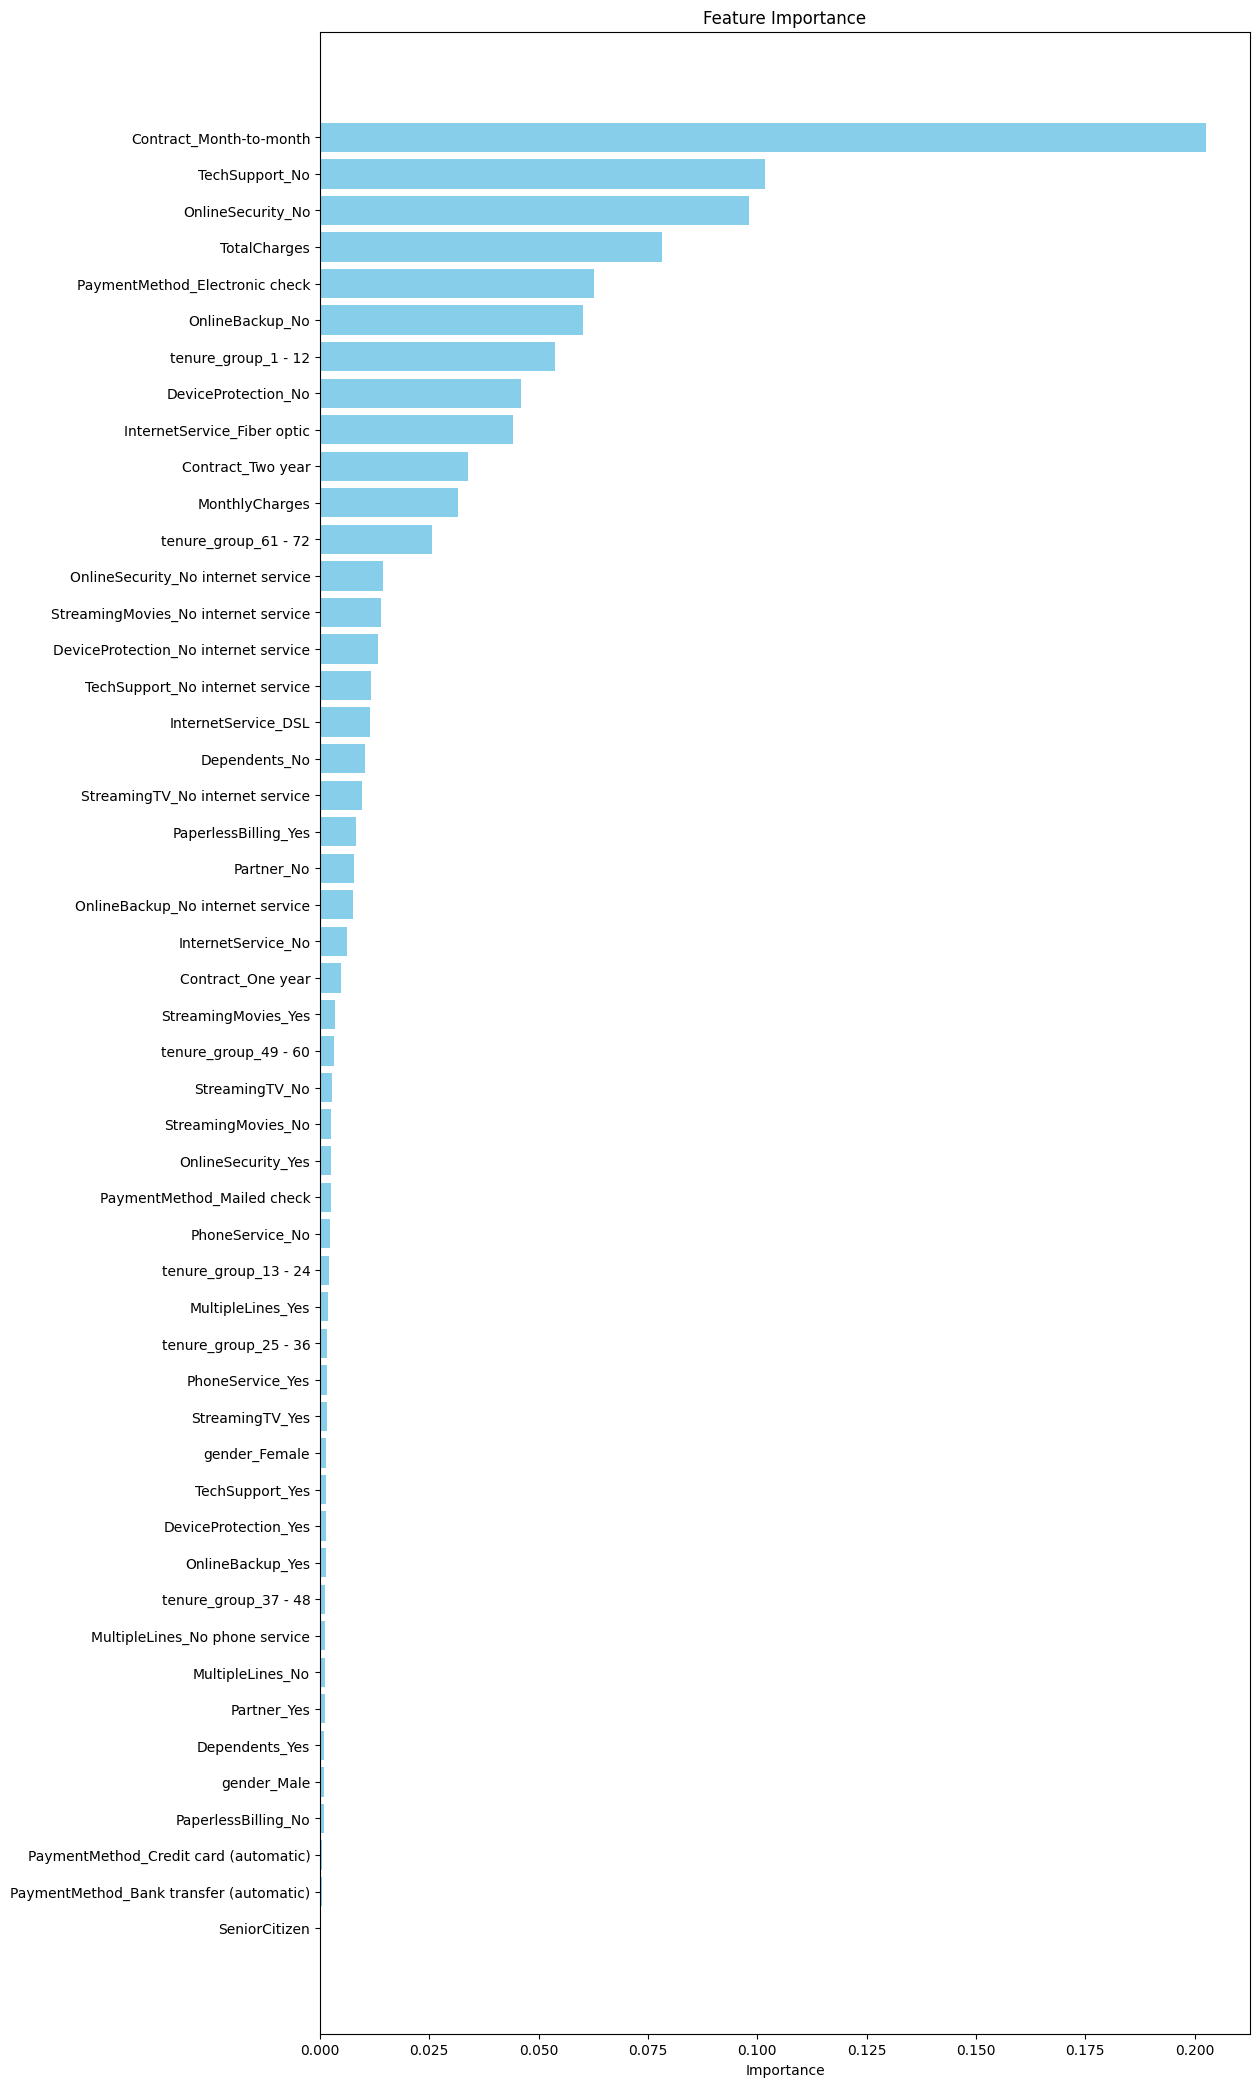

In [48]:
import matplotlib.pyplot as plt

# Plotting feature importances
plt.figure(figsize=(12, 26))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()
